# MC-BNB / MC-Cosmic comparison to data

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import json
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/MCCosmic/'

In [3]:
versions['overlay date'] = '2018_07_24'

In [4]:
Tune1samples = load_samples(date=versions['overlay date'],filename='prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev'+'_'+versions['overlay date']+'_vertices')
print 
Tune3samples = load_samples(date=versions['overlay date'],filename='prodgenie_bnb_nu_cosmic_uboone_MCC8Tune3_mcc8.7_reco2_dev'+'_'+versions['overlay date']+'_vertices')

77177 ccqe candidate pairs, 53305 in FV
10785 are 1mu-1p, 20.2%
8496 are other pairs, 15.9%
34064 are cosmic, 63.9%
--------------------------------------------------------------
5310 are CC 1p 0pi, 10.0%
I finished loading overlay samples. We have in total 77177 pairs

154948 ccqe candidate pairs, 106279 in FV
20345 are 1mu-1p, 19.1%
19040 are other pairs, 17.9%
66992 are cosmic, 63.0%
--------------------------------------------------------------
10352 are CC 1p 0pi, 9.7%
I finished loading overlay samples. We have in total 154948 pairs


## 2. apply the event-selection cuts

In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedTune1,_,_ = apply_cuts_to_overlay(OverlaySamples=Tune1samples, cuts_order=cuts_order)
print 'applied cuts to tune-1'
reducedTune3,_,_ = apply_cuts_to_overlay(OverlaySamples=Tune3samples, cuts_order=cuts_order)
print 'applied cuts to tune-3'

applied cuts to tune-1
applied cuts to tune-3


In [17]:
selected_tune1=dict()
for pair_type in pair_types[0:4]:
    sam = reducedTune1['Pt & delta phi'][pair_type]
    sam['Ev_inclusive'] = ((2.*0.905*sam['reco_Emu'] - (np.square(0.905) + np.square(0.1065) - np.square(0.938)))
                       /(2.*(0.905 - sam['reco_Emu'] + sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))))
    sam['Q2_inclusive'] = -np.square(0.1065) + 2.*sam['Ev_inclusive']*(sam['reco_Emu'] - sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))
    selected_tune1[pair_type] = sam
selected_tune1_concat = pd.concat([selected_tune1['1mu-1p'],selected_tune1['cosmic'],selected_tune1['other pairs']])    
print len(selected_tune1_concat),'events in the tune-1'

selected_tune3=dict()
for pair_type in pair_types[0:4]:
    sam = reducedTune3['Pt & delta phi'][pair_type]
    sam['Ev_inclusive'] = ((2.*0.905*sam['reco_Emu'] - (np.square(0.905) + np.square(0.1065) - np.square(0.938)))
                       /(2.*(0.905 - sam['reco_Emu'] + sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))))
    sam['Q2_inclusive'] = -np.square(0.1065) + 2.*sam['Ev_inclusive']*(sam['reco_Emu'] - sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))
    selected_tune3[pair_type] = sam
selected_tune3_concat = pd.concat([selected_tune3['1mu-1p'],selected_tune3['cosmic'],selected_tune3['other pairs']])    
print len(selected_tune3_concat),'events in the tune-3'

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2295 events in the tune-1


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


4759 events in the tune-3


In [7]:
versions['overlay date'] = '2018_07_24'
sum_path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
summary_tune1 = pd.read_csv(sum_path+versions['overlay date']+'/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_'+versions['overlay date']+'_summary.csv')
POT_tune1  = np.sum(summary_tune1.POT)
summary_tune3 = pd.read_csv(sum_path+versions['overlay date']+'/prodgenie_bnb_nu_cosmic_uboone_MCC8Tune3_mcc8.7_reco2_dev_'+versions['overlay date']+'_summary.csv')
POT_tune3  = np.sum(summary_tune3.POT)
fPOT_tune1 = 5e19/POT_tune1
print 'POT_tune1:',POT_tune1,',fPOT_tune1:',fPOT_tune1
fPOT_tune3 = 5e19/POT_tune3
print 'POT_tune3:',POT_tune3,',fPOT_tune3:',fPOT_tune3

POT_tune1: 2.01905701e+20 ,fPOT_tune1: 0.247640357614
POT_tune3: 4.31667174e+20 ,fPOT_tune3: 0.115829979696


## tune-1 vs. tune-3

In [8]:
mA_array = [0.7,0.99,1.3]
# mA_array = np.concatenate([[0.4],linspace(0.55,1.2,13),[1.3,1.35,1.5,1.6,1.7]])
# [0.40,0.70,0.80,0.95,0.99,1.00,1.10,1.15,1.35,1.71]
# mA_names = ['040','070','080','095','099','100','110','115','135','171']

### reco-$Q^2$

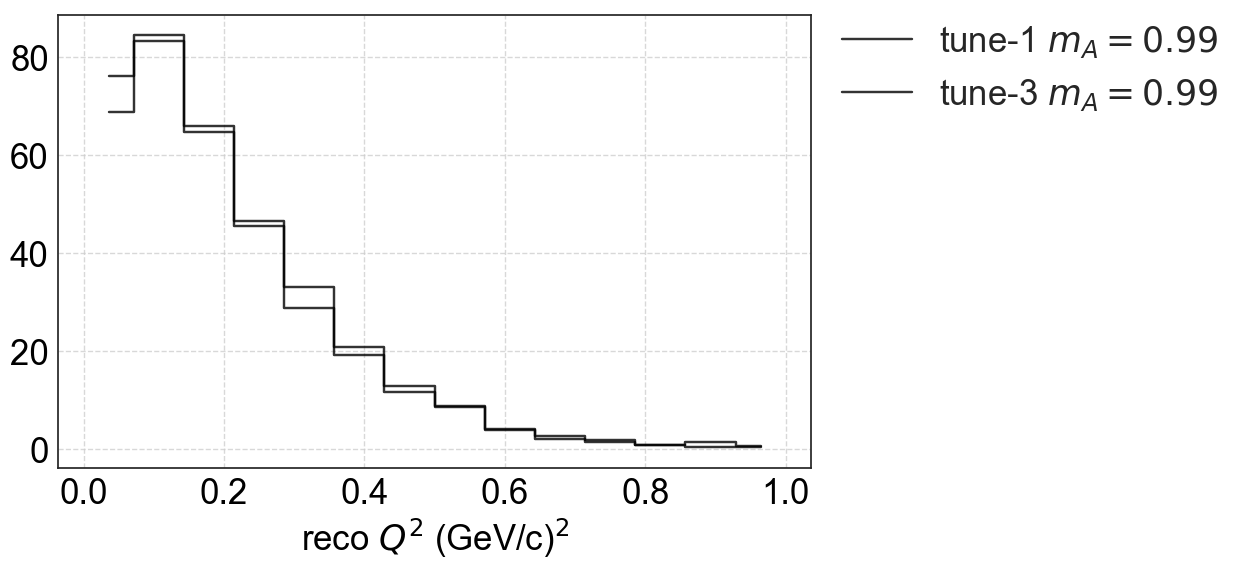

In [9]:
fig,ax=plt.subplots(figsize=(9.708,6))
bins = linspace(0,1,15); mid = 0.5*(bins[1:]+bins[:-1])
for mA,color in zip( [0.99],['blue']): #(mA_array,['red','blue','black']):
    name = '%.0f'%(mA*100)    
    for OverlaySamples,label,fPOT in zip([selected_tune1,selected_tune3]
                                        ,['tune-1','tune-3']
                                        ,[fPOT_tune1,fPOT_tune3]):
        overlay_scaling = get_samples_scaling( N_total='MC(tot) x POT', debug=0
                                              , OverlaySubsamples=OverlaySamples
                                              , f_POT=Nevents['f(POT)'])        
        h_overlay, h_overlay_err = plot_stacked_MCsamples( OverlaySamples=OverlaySamples
                                                          , var='reco_Q2', bins=bins 
                                                          , stackLabel=label+r' $m_A=%.2f$'%mA
                                                          , weights_var='evwgh_mA'+name+'_Genie'
                                                          , norm=350
                                                          , do_draw=True, ax=ax
                                                          , overlay_scaling=overlay_scaling
                                                         )
#         h,_ = np.histogram(sam['reco_Q2'],weights=sam['evwgh_mA'+name+'_Genie'],bins=bins)
#         h = h*fPOT
#         plt.step(mid,h,color=color,label=label+r' $m_A=%.2f$'%mA,linestyle=linestyle,where='mid')
set_axes(ax,r'reco $Q^2$ (GeV/c)$^2$','',do_add_legend=False)
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

### compare with MC/cosmic data overlay and with the beam-on data

In [16]:
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
sam = selected_events
sam['reco_Emu'] = np.sqrt(np.square(sam['reco_Pmu'])+np.square(0.1056))
sam['Ev_inclusive'] = ((2.*0.905*sam['reco_Emu'] - (np.square(0.905) + np.square(0.1065) - np.square(0.938)))
                       /(2.*(0.905 - sam['reco_Emu'] + sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))))
sam['Q2_inclusive'] = -np.square(0.1065) + 2.*sam['Ev_inclusive']*(sam['reco_Emu'] - sam['reco_Pmu']*np.cos(sam['reco_Pmu_theta']))

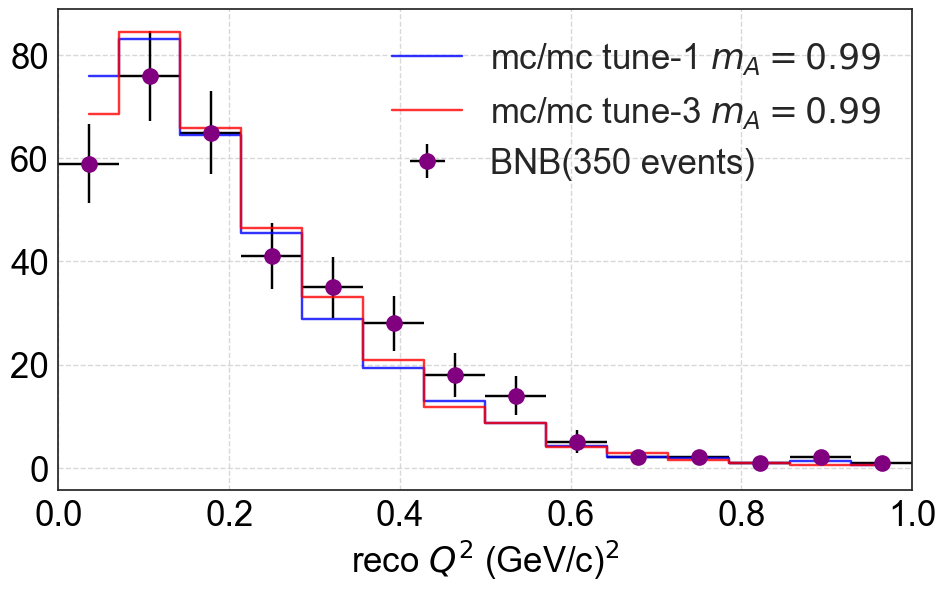

In [11]:
# shape-comparison
fig,ax=plt.subplots(figsize=(9.708,6))
bins = linspace(0,1,15); mid = 0.5*(bins[1:]+bins[:-1])
for mA,color in zip( [0.99],['tomato']): #(mA_array,['red','blue','black']):
    name = '%.0f'%(mA*100)    
    for samples,label,color,fPOT in zip([selected_tune1,selected_tune3]
                                        ,['mc/mc tune-1','mc/mc tune-3']
                                        ,['blue','red']
                                        ,[fPOT_tune1,fPOT_tune3]):
        h_overlay, h_overlay_err = plot_stacked_MCsamples( OverlaySamples=samples
                                                          , stackColor=color
                                                          , var='reco_Q2', bins=bins 
                                                          , stackLabel=label+r' $m_A=%.2f$'%mA
                                                          , weights_var='evwgh_mA'+name+'_Genie'
                                                          , norm=350
                                                          , do_draw=True, ax=ax
                                                          , overlay_scaling=overlay_scaling
                                                         )
plot_OnBeam(OnBeamSample=selected_events,var='reco_Q2',color='purple',bins=bins,ax=ax)
set_axes(ax,r'reco $Q^2$ (GeV/c)$^2$','',do_add_legend=True,xlim=(0,1))

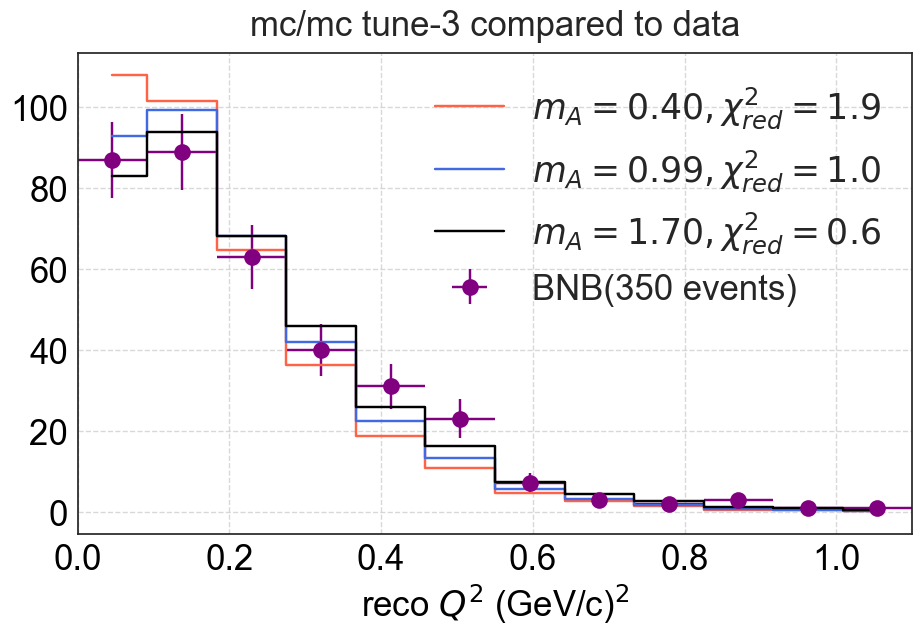

In [13]:
# shape-comparison
fig,ax=plt.subplots(figsize=(9.708,6))
Q2min,Q2max,nbins = 0.0,1.1,13
bins = linspace(Q2min,Q2max,nbins); mid = 0.5*(bins[1:]+bins[:-1])
data = selected_events[(Q2min<selected_events['reco_Q2'])&(selected_events['reco_Q2']<Q2max)]
N = float(len(data))
hdata,hdata_err = plot_OnBeam(OnBeamSample=data,var='reco_Q2',color='purple',bins=bins,ax=ax,ecolor='purple',do_return_h=True)
for mA,color in zip([0.4,0.99,1.7],['tomato','royalblue','black']):
    name = '%.0f'%(mA*100)
    hsim, hsim_err = plot_stacked_MCsamples( OverlaySamples=selected_tune3                                                          
                                                      , stackColor=color                                                      
                                                      , var='reco_Q2', bins=bins                                                       
                                                      , stackLabel=label+r' $m_A=%.2f$'%mA                                                      
                                                      , weights_var='evwgh_mA'+name+'_Genie'                                                      
                                                      , norm=350                                                      
                                                      , do_draw=False, ax=ax                                                      
                                                      , overlay_scaling=overlay_scaling                                                      
                                                     )
    chi2,ndf = chi2_two_histograms(bins=bins,chi2_xrange=(Q2min,Q2max)
                                   ,h1=hdata,h2=hsim
                                   ,h1err=hdata_err,h2err=hsim_err)
    plt.step(mid,hsim,color=color,label=r'$m_A=%.2f, \chi^2_{red}=%.1f$'%(mA,chi2/ndf),linestyle='-',where='mid')
set_axes(ax,r'reco $Q^2$ (GeV/c)$^2$','',do_add_legend=True,xlim=(Q2min,Q2max),title='mc/mc tune-3 compared to data')

# What goes into $Q^2$: $p_\mu,\theta_\mu,p_p,\theta_p$

In [14]:


# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Dec-6,2017 (last edit July-17,2018)
def plot_OnBeam(OnBeamSample=None,do_draw=True
                , var='PIDa_assigned_proton' , multiply=1, x_label='$PID_a^p$', label='BNB'
                , bins=np.linspace(0,30,31),markersize=12
                , ax=None, figsize=(14,6),fontsize=25                
                , color=OnBeamColor, ecolor='black'
                , do_add_legend=False , legend_loc='best',y_label='counts'
                , remove_ticks_x=False, remove_ticks_y=False
                , do_return_h=False):
    bin_width = bins[1]-bins[0]
    mid = 0.5*(bins[:-1]+bins[1:])
    
    if ax is None and do_draw is True: fig,ax=plt.subplots(figsize=figsize)
    x = multiply*OnBeamSample[var]
    h_OnBeam,edges = np.histogram( x , bins=bins )
    h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
    if do_draw:
        plt.errorbar( x = mid, xerr=bin_width/2., markersize=markersize
                 , y=h_OnBeam , yerr=h_OnBeam_err
                 , fmt='o', color=color , ecolor=ecolor
                 , label=label +'(%d events)'%len(OnBeamSample)
                )
        plt.plot([0,0],[0,0],'--',color='black',linewidth=2)
    
        set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize
             ,xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width)
             ,remove_ticks_x=remove_ticks_x, remove_ticks_y=remove_ticks_y
            )
        if do_add_legend:
            if legend_loc=='bbox':
                leg=plt.legend(bbox_to_anchor=(1.,1.05),fontsize=fontsize,loc=2)
            else:
                leg=plt.legend(fontsize=fontsize,loc=legend_loc)
        plt.tight_layout()
    if do_return_h is True: return h_OnBeam,h_OnBeam_err
    if do_draw is True and do_add_legend is False: return ax,h_OnBeam
    return ax,leg,h_OnBeam,h_OnBeam_err
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -

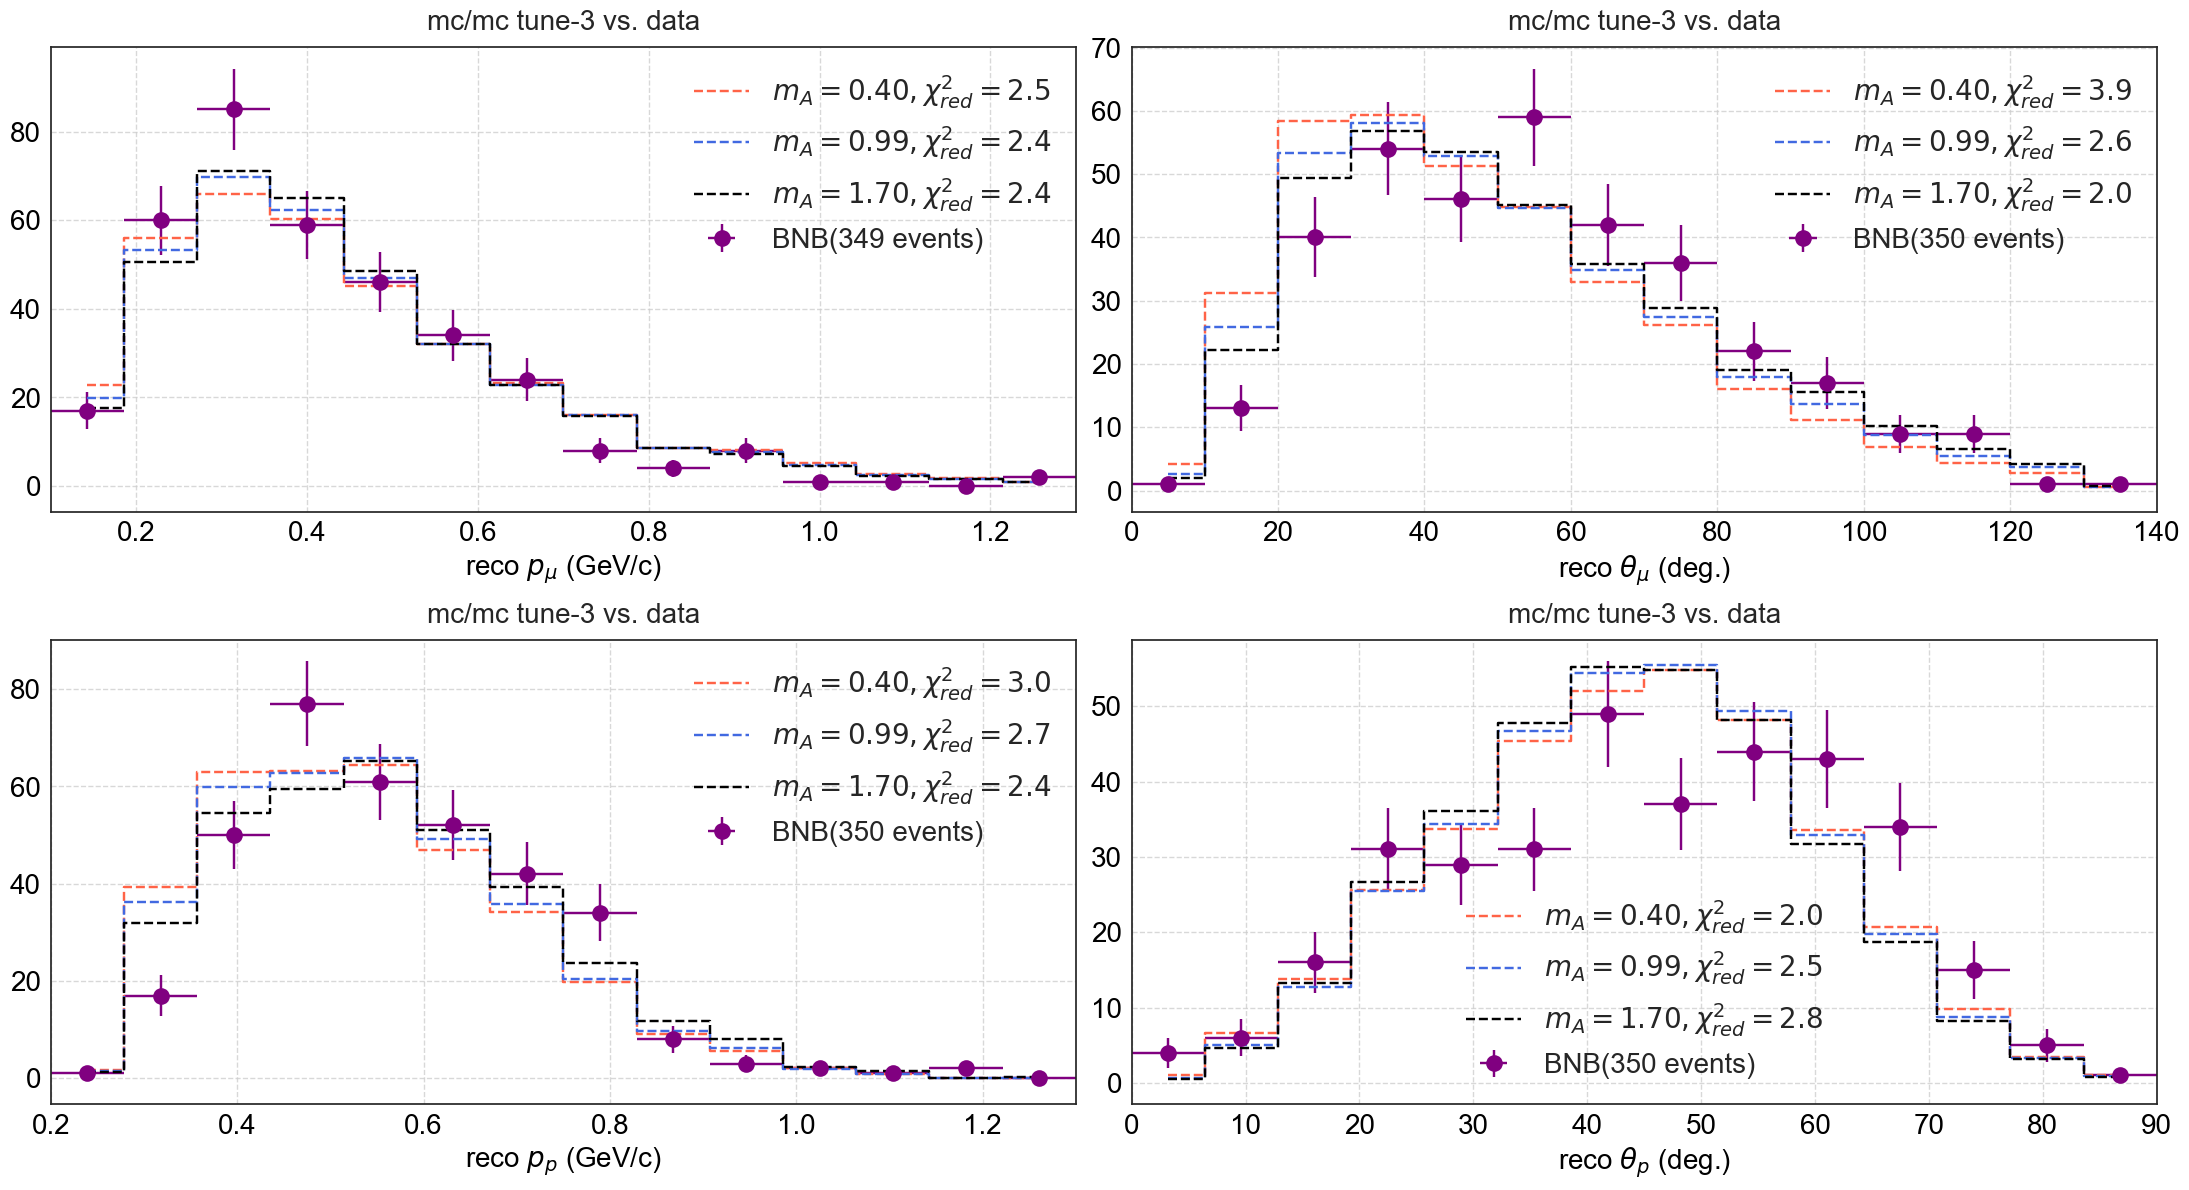

In [15]:
# shape-comparison
fig=plt.figure(figsize=(22,12))
nbins = 15
for iax,(var,xlim,xlabel) in enumerate(zip(['reco_Pmu','reco_Pmu_theta','reco_Pp','reco_Pp_theta']                                   
                                           ,[(0.1,1.3),(0,140),(0.2,1.3),(0,90)]
                                           ,[r'reco $p_\mu$ (GeV/c)',r'reco $\theta_\mu$ (deg.)',r'reco $p_p$ (GeV/c)',r'reco $\theta_p$ (deg.)'])):
    bins = linspace(xlim[0],xlim[1],nbins); mid = 0.5*(bins[1:]+bins[:-1])
    ax = fig.add_subplot(2,2,iax+1)
    data = selected_events[(xlim[0]<selected_events[var])&(selected_events[var]<xlim[1])]
    N = float(len(data))
    mc = selected_tune3_concat[(xlim[0]<selected_tune3_concat[var])&(selected_tune3_concat[var]<xlim[1])]
    multiply=180./np.pi if 'theta' in var else 1
    hdata,hdata_err = plot_OnBeam(OnBeamSample=data,var=var,multiply=multiply
                                  ,color='purple',bins=bins,ax=ax,ecolor='purple',do_return_h=True)
    for mA,color in zip([0.4,0.99,1.7],['tomato','royalblue','black']):
        name = '%.0f'%(mA*100)
        hsim,_ = np.histogram(multiply*mc[var],weights=mc['evwgh_mA'+name+'_Genie'],bins=bins)
        hsim_err = np.sqrt(hsim)*N/np.sum(hsim)
        hsim = hsim*N/np.sum(hsim)    
        chi2,ndf = chi2_two_histograms(bins=bins,chi2_xrange=xlim
                                       ,h1=hdata,h2=hsim,h1err=hdata_err,h2err=hsim_err)
        plt.step(mid,hsim,color=color,label=r'$m_A=%.2f, \chi^2_{red}=%.1f$'%(mA,chi2/ndf),linestyle='--',where='mid')
    set_axes(ax,xlabel,'',do_add_legend=True if iax==0 else True,fontsize=20
             ,xlim=xlim,title='mc/mc tune-3 vs. data')
plt.tight_layout()

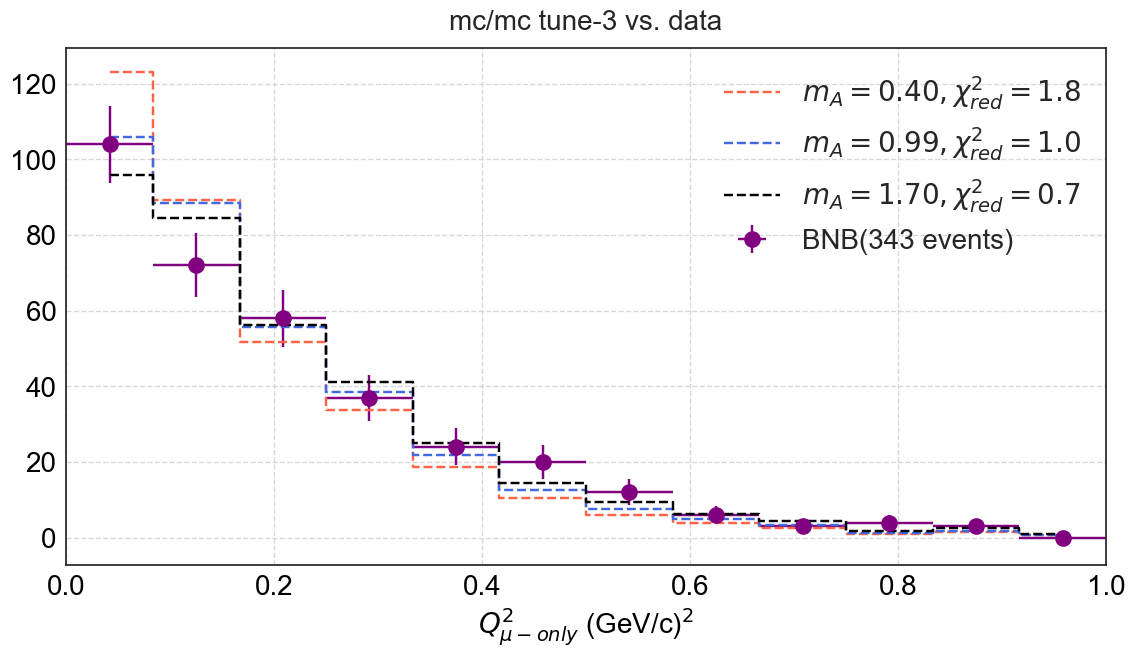

In [22]:
fig=plt.figure(figsize=(22,12))
nbins = 13
for iax,(var,xlim,xlabel) in enumerate(zip(['Q2_inclusive'],[(0.,1)],[r'$Q^2_{\mu-only}$ (GeV/c)$^2$'])):
    bins = linspace(xlim[0],xlim[1],nbins); mid = 0.5*(bins[1:]+bins[:-1])
    ax = fig.add_subplot(2,2,iax+1)
    data = selected_events[(xlim[0]<selected_events[var])&(selected_events[var]<xlim[1])]
    N = float(len(data))
    mc = selected_tune3_concat[(xlim[0]<selected_tune3_concat[var])&(selected_tune3_concat[var]<xlim[1])]
    hdata,hdata_err = plot_OnBeam(OnBeamSample=data,var=var
                                  ,color='purple',bins=bins,ax=ax,ecolor='purple',do_return_h=True)
    for mA,color in zip([0.4,0.99,1.7],['tomato','royalblue','black']):
        name = '%.0f'%(mA*100)
        hsim,_ = np.histogram(mc[var],weights=mc['evwgh_mA'+name+'_Genie'],bins=bins)
        hsim_err = np.sqrt(hsim)*N/np.sum(hsim)
        hsim = hsim*N/np.sum(hsim)    
        chi2,ndf = chi2_two_histograms(bins=bins,chi2_xrange=xlim
                                       ,h1=hdata,h2=hsim,h1err=hdata_err,h2err=hsim_err)
        plt.step(mid,hsim,color=color,label=r'$m_A=%.2f, \chi^2_{red}=%.1f$'%(mA,chi2/ndf),linestyle='--',where='mid')
    set_axes(ax,xlabel,'',do_add_legend=True if iax==0 else True,fontsize=20
             ,xlim=xlim,title='mc/mc tune-3 vs. data')
plt.tight_layout()